In [2]:
# https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [269]:
df = pd.read_csv('car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [270]:
# rename

col = ['buying_price', 'maintenance_cost', 'number_of_doors', 'number_of_persons',
       'lug_boot', 'safety', 'decision']

In [273]:
df = pd.read_csv('car_evaluation.csv', names = col)
df.head()

,buying_price,maintenance_cost,number_of_doors,number_of_persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [274]:
df.dtypes

buying_price         object
maintenance_cost     object
number_of_doors      object
number_of_persons    object
lug_boot             object
safety               object
decision             object
dtype: object

In [275]:
df['number_of_doors'].value_counts()

number_of_doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

In [276]:
x = df.drop('safety', axis = 1)
y = df['safety']

In [277]:
col_list = list(x.columns)

In [281]:
def label_encode(df, col_list):
    df_copy = df.copy()

    from sklearn.preprocessing import LabelEncoder

    for col in col_list:
        le = LabelEncoder()
        df_copy[col] = le.fit_transform(df_copy[col])
        
    return df_copy

In [284]:
x = label_encode(x, col_list)

In [287]:
x

,buying_price,maintenance_cost,number_of_doors,number_of_persons,lug_boot,decision
0,3,3,0,0,2,2
1,3,3,0,0,2,2
2,3,3,0,0,2,2
3,3,3,0,0,1,2
4,3,3,0,0,1,2
...,...,...,...,...,...,...
1723,1,1,3,2,1,1
1724,1,1,3,2,1,3
1725,1,1,3,2,0,2
1726,1,1,3,2,0,1


In [289]:
df.shape

(1728, 7)

#### cross validation

In [292]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   random_state= 0,
                                                   test_size= 0.2)

#### build the model

In [295]:
from sklearn.ensemble import RandomForestClassifier

In [297]:
clf = RandomForestClassifier(random_state= 0, n_estimators = 100)

In [299]:
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

#### Evaluate

In [302]:
y_pred = clf.predict(x_test)

In [304]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

In [306]:
accuracy_score(y_test, y_pred)

0.32947976878612717

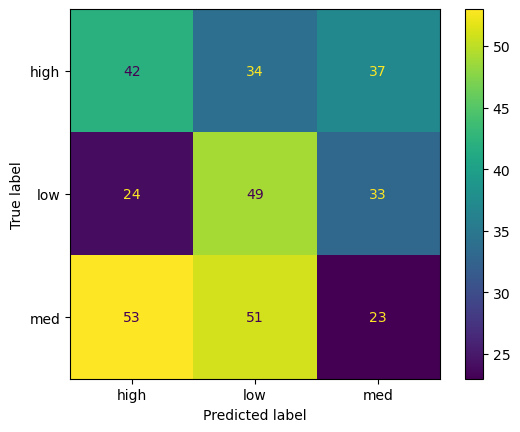

In [308]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [310]:
clf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=209652396),
 DecisionTreeClassifier(max_features='sqrt', random_state=398764591),
 DecisionTreeClassifier(max_features='sqrt', random_state=924231285),
 DecisionTreeClassifier(max_features='sqrt', random_state=1478610112),
 DecisionTreeClassifier(max_features='sqrt', random_state=441365315),
 DecisionTreeClassifier(max_features='sqrt', random_state=1537364731),
 DecisionTreeClassifier(max_features='sqrt', random_state=192771779),
 DecisionTreeClassifier(max_features='sqrt', random_state=1491434855),
 DecisionTreeClassifier(max_features='sqrt', random_state=1819583497),
 DecisionTreeClassifier(max_features='sqrt', random_state=530702035),
 DecisionTreeClassifier(max_features='sqrt', random_state=626610453),
 DecisionTreeClassifier(max_features='sqrt', random_state=1650906866),
 DecisionTreeClassifier(max_features='sqrt', random_state=1879422756),
 DecisionTreeClassifier(max_features='sqrt', random_state=1277901399),
 DecisionTree

In [312]:
clf.feature_importances_

array([0.17416117, 0.14798762, 0.16064486, 0.11948724, 0.12327674,
       0.27444237])